Importing all the required packages

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

Importing the Training Dataset

In [5]:
train_csv = pd.read_csv("./train 2.csv")

Checking the info of imported dataset

In [6]:
print(train_csv.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB
None


In [7]:
test_csv = pd.read_csv("./test.csv")

Priniting the count of Target Variables 

In [8]:
print(train_csv['TARGET'].value_counts())

0    73012
1     3008
Name: TARGET, dtype: int64


Calculting the Dissatification Ratio 

In [9]:
#Rate of dissatification. 
train_st = train_csv[train_csv['TARGET'] == 1].TARGET.count()
train_total = train_csv.TARGET.count()

print("Ratio of Dissatisification is  {0:.2f}%".format(train_st /train_total * 100))

Ratio of Dissatisification is  3.96%


Cleaning the data
Getting the count of values [-999999]

In [10]:
#Data Cleaning 
#Knowing the values of -999999
train_clean = train_csv['var3'].value_counts()[-999999]

In [11]:
train_clean

116

Replacing the values [-999999] with [2] in train dataset 

In [12]:
train_replace = train_csv['var3']=train_csv['var3'].replace([-999999],[2])

In [13]:
train_replace

0        2
1        2
2        2
3        2
4        2
        ..
76015    2
76016    2
76017    2
76018    2
76019    2
Name: var3, Length: 76020, dtype: int64

Replacing the values [-999999] with [2] in test dataset 

In [14]:
test_replace = test_csv['var3']=test_csv['var3'].replace([-999999],[2])

Dropping the ID and Target Columns and preparing the features in train dataset 

In [15]:
features = train_csv.drop(['ID', 'TARGET'], axis=1)
features

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000


Dropping the ID Columns in test dataset

In [16]:
test_f = test_csv.drop(['ID'], axis=1)

In [17]:
test_f

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.100000
1,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.720000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.950000
3,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.610000
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.730000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40243.200000
75814,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146961.300000
75815,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167299.770000
75816,2,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


Separation of feature and declaring label from the train dataset

In [18]:
labels = train_csv.iloc[:,-1]

Part 2 Create MLAs : Extreme Gradient Boost (XGBoost)

In [19]:
!pip install xgboost
from xgboost import XGBClassifier

You should consider upgrading via the '/Users/kavishshah/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [20]:
!pip install --upgrade pip'

zsh:1: unmatched '


Here the data is split into train and test data. The test data makes up 20% of the entire dataset and the remaining 80% will be utilized as training data.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state=156)

Here, the function 'get_clf_eval' is created to calculate accuracy, precision, recall, F1 score, ROC_AUC

In [22]:
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc =  roc_auc_score(y_test, pred_proba)   
    print('confusion matrix')
    print(confusion)

    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'. format(accuracy, 
            precision, recall, f1, roc_auc))

Training the Extreme Gradient Boost (XGBoost) Model using the training dataset.

In [23]:
xgb_clf = XGBClassifier(n_estimators=20, learning_rate=0.7, max_depth=3, eval_metric='logloss')

xgb_clf.fit(X_train, y_train)

pred = xgb_clf.predict(X_test)
pred_proba = xgb_clf.predict_proba(X_test)[:,1]

Used the package accuracy, precision, recall, f1 and roc_auc to know the accuracy and confusion matrix of the model. A confuse matrix is usually used to 
identify the where we get false positives or false negatives and hence how the algorithm has performed. The accuracy comes to 96%
which means that the model is properly fitted. 

In [24]:
get_clf_eval(y_test, pred, pred_proba)

confusion matrix
[[14586     7]
 [  609     2]]
accuracy: 0.9595, precision: 0.2222, recall: 0.0033, F1: 0.0065, AUC: 0.8385


On the basis of train dataset. The gradient boosting model is trained. Using the same trained model the new target values 
is predicted on the test dataset. test_1 variable gives the predicted target values of the test dataset


In [25]:
test_1 = xgb_clf.predict(test_f)

In [26]:
test_1 

array([0, 0, 0, ..., 0, 0, 0])

The important features used for the Extreme Gradient Boost (XGBoost) model are displayed in the bar chart below.From the bar chart, we can see that the Customer age (var15) and the current balance (saldo_var30) are the two most useful features.

<AxesSubplot:title={'center':'XGBoost - Feature importance'}, xlabel='Importance', ylabel='Features'>

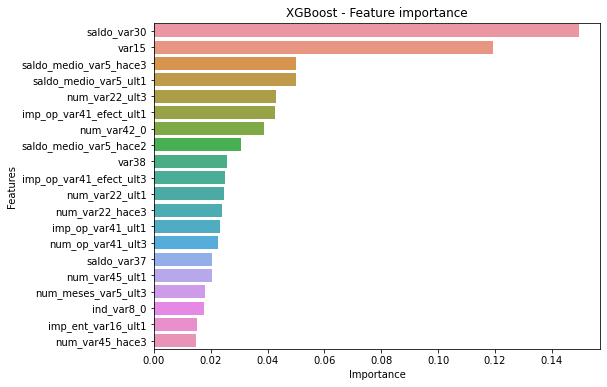

In [29]:
ftr_importances_values = xgb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = features.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize=(8,6))
plt.title('XGBoost - Feature importance')
plt.ylabel('Features')
plt.xlabel('Importance')
sns.barplot(x=ftr_top20, y=ftr_top20.index)